# 27. Pandas Project - 주식 가격 분석

In [1]:
# !pip install pandas-datareader
# !pip install finance-datareader

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data_reader
import FinanceDataReader as fdr
import datetime

## 삼성전자 주식 가격

- 데이터 불러오기

In [3]:
SAMSUNG = data_reader.DataReader("005930.KS", data_source="yahoo")
SAMSUNG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-16,46380.0,46000.0,46220.0,46200.0,21913650.0,39894.019531
2017-08-17,47300.0,46740.0,46960.0,47040.0,12415850.0,40619.363281
2017-08-18,47240.0,46240.0,46760.0,46900.0,10477950.0,40498.480469
2017-08-21,47240.0,46580.0,47240.0,46840.0,5103450.0,40446.664062
2017-08-22,47160.0,46700.0,46820.0,47000.0,7381750.0,40584.828125


In [4]:
SAMSUNG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-08,61400.0,60600.0,61400.0,60800.0,11313150.0,60800.0
2022-08-09,60700.0,59600.0,60600.0,60000.0,18251170.0,60000.0
2022-08-10,59200.0,58600.0,58900.0,59100.0,18084349.0,59100.0
2022-08-11,60000.0,59300.0,59600.0,59900.0,15141941.0,59900.0
2022-08-12,60700.0,59400.0,59500.0,60200.0,10786658.0,60200.0


- 데이터 시각화

<AxesSubplot:xlabel='Date'>

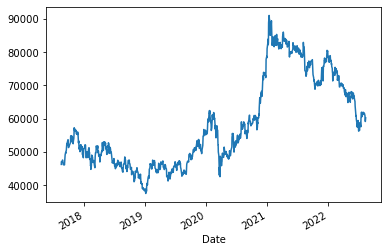

In [5]:
SAMSUNG['Close'].plot()

- csv 파일 저장

In [6]:
SAMSUNG.to_csv("SAMSUNG.csv")

## 데이터 불러오기 일반 함수화

In [7]:
def get_stock_price(country, ticker):
    if country == "KR":
        df = data_reader.DataReader(ticker + ".KS", data_source="yahoo")
    elif country == "US":
        df = data_reader.DataReader(ticker, data_source="yahoo")
    return df

- Tesla 주가 불러오기

In [8]:
df = get_stock_price("US", "TSLA")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-15,73.098000,71.874001,73.040001,72.466003,15425500.0,72.466003
2017-08-16,73.300003,72.503998,72.599998,72.582001,17069000.0,72.582001
2017-08-17,72.660004,70.318001,72.241997,70.384003,25138500.0,70.384003
2017-08-18,70.800003,69.160004,70.582001,69.491997,27041000.0,69.491997
2017-08-21,69.164001,66.370003,69.164001,67.571999,32477000.0,67.571999


-  주가 변화 시각화

<AxesSubplot:xlabel='Date'>

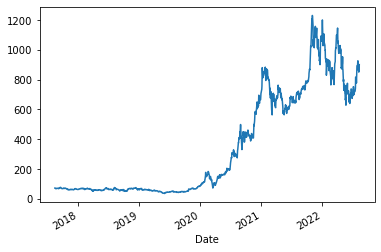

In [9]:
df['Close'].plot()

## 여러 주식 종목의 가격 비교

- 주식 종목 불러오기

In [10]:
tesla = get_stock_price("US", "TSLA")
ford = get_stock_price("US", "FORD")
apple = get_stock_price("US", "AAPL")
google = get_stock_price("US", "GOOGL")
sec = get_stock_price("KR", "005930")

- 비트코인 가격 불러오기

In [11]:
start = datetime.datetime(2017, 8, 1)

bit = fdr.DataReader("BTC/USD", data_source="yahoo", start=start)
bit.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-08-01,2747.0,2883.3,2946.0,2659.6,123170.0,-0.0473
2017-08-02,2720.5,2747.0,2773.8,2668.9,81820.0,-0.0096
2017-08-03,2810.0,2720.5,2822.9,2717.6,68100.0,0.0329
2017-08-04,2878.5,2810.0,2892.7,2779.5,68760.0,0.0244
2017-08-05,3262.8,2878.5,3344.0,2875.9,159400.0,0.1335


### Normalized Price

- 시초가를 1 로 맞추어 놓고 변화된 상대 가격 비교

In [12]:
tesla['normed Close'] = tesla['Close']/tesla['Close'][0]
ford['normed Close'] = ford['Close']/ford['Close'][0]
apple['normed Close'] = apple['Close']/apple['Close'][0]
google['normed Close'] = google['Close']/google['Close'][0]
sec['normed Close'] = sec['Close']/sec['Close'][0]
bit['normed Close'] = bit['Close']/bit['Close'][0]

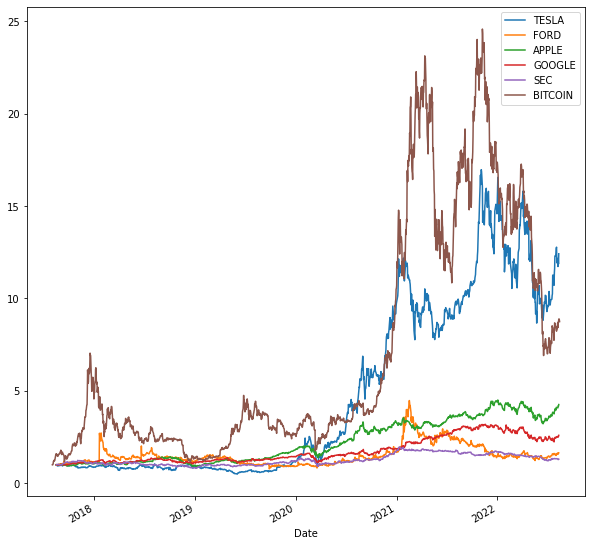

In [13]:
plt.figure(figsize=(10, 10))
tesla['normed Close'].plot(label='TESLA')
ford['normed Close'].plot(label='FORD')
apple['normed Close'].plot(label='APPLE')
google['normed Close'].plot(label='GOOGLE')
sec['normed Close'].plot(label='SEC')
bit['normed Close'].plot(label='BITCOIN')
plt.legend()